In [11]:
from collections import deque
from typing import List
from netgraph import Graph

# Node

In [22]:
class Node:

    def __init__(self, data):
        self.children = []
        self.data = data

    def add(self, data):
        if isinstance(data, Node):
            n=data
        else:
            n=Node(data)
        self.children.append(n)
        return n

    # def __repr__(self) -> str:
    def __str__(self, level=0):
        return repr(self.data)

    # def __str__(self, level=0):
    # def __repr__(self) -> str:
    #     ret =  "   " * level + str(self.data) + "\n"
    #     for child in self.children:
    #         ret += child.__str__(level + 1)
    #     return ret

def prn_tree(node, level=0):
    ret =  "   " * level + str(node.data) + "\n"
    for child in node.children:
        ret += prn_tree(child, level + 1)
    return ret

In [61]:
def links(n, lnks=[], nodes=[]):
    for i in n.children:
        pair = (n.data, i.data)
        nodes.add(n.data)
        nodes.add(i.data)
        if pair not in lnks:
            lnks.append(pair)
        links(i, lnks, nodes)

In [89]:
def setup1():
    a = Node('A')
    c = a.add('C')
    b = a.add('B')
    b.add(c)
    d = c.add('D')
    e = c.add('E')
    d.add(e)
    i = e.add('I')
    f = c.add('F')
    g = c.add('G')
    f.add(g)
    k = g.add('H').add('L').add('K')
    i.add(k)
    j = i.add('J')
    k.add(j)

    return a

In [90]:
lnks, nodes = [], set()
A = setup1()

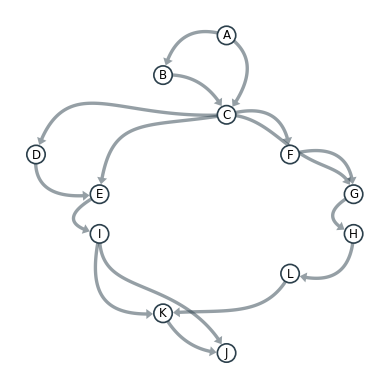

In [116]:
links(A, lnks, nodes)
Graph(lnks, node_labels=dict(zip(nodes, nodes)), arrows=True,  
      node_layout='dot', 
      edge_layout='curved');

In [ ]:
['A', 'C', 'B', 'D', 'E', 'F', 'G', 'I', 'H', 'K', 'J', 'L']

# BFS

In [122]:
def bfs(root: Node):
    queue = deque([root])
    order = []

    while len(queue) > 0:
        cur_node = queue.popleft()
        if cur_node.data not in order:
            order.append(cur_node.data)

        if cur_node.children:
            queue.extend(cur_node.children)

    return order

In [124]:
bfs(A)

['A', 'C', 'B', 'D', 'E', 'F', 'G', 'I', 'H', 'K', 'J', 'L']

# Post Order

In [ ]:
def peek(stack): 
    if len(stack) > 0: 
        return stack[-1] 
    return None

def postOrderIterative(root):  
    stack = [] 
     
    while(True): 
        while (root): 
            # Push root's right child and then root to stack 
            if root.right is not None: 
                stack.append(root.right) 
            stack.append(root) 
 
            # Set root as root's left child 
            root = root.left 
         
        # Pop an item from stack and set it as root 
        root = stack.pop() 
 
        # If the popped item has a right child and the 
        # right child is not processed yet, then make sure 
        # right child is processed before root 
        if (root.right is not None and
            peek(stack) == root.right): 
            stack.pop() # Remove right child from stack 
            stack.append(root) # Push root back to stack 
            root = root.right # change root so that the 
                            # right childis processed next 
 
        # Else print root's data and set root as None 
        else: 
            ans.append(root.data) 
            root = None
 
        if (len(stack) <= 0): 
                break

In [ ]:
procedure iterativePostorder(node)
    stack ← empty stack
    lastNodeVisited ← null
    while not stack.isEmpty() or node ≠ null
        if node ≠ null
            stack.push(node)
            node ← node.left
        else
            peekNode ← stack.peek()
            // if right child exists and traversing node
            // from left child, then move right
            if peekNode.right ≠ null and lastNodeVisited ≠ peekNode.right
                node ← peekNode.right
            else
                visit(peekNode)
                lastNodeVisited ← stack.pop()

# Visitor

In [5]:
import types
class Node:
    pass

class NodeVisitor:
    def visit(self, node):
        stack = [node]
        last_result = None
        while stack:
            try:
                last = stack[-1]
                if isinstance(last, Node):
                    stack.append(self._visit(stack.pop()))
                else:
                    last_result = stack.pop()
            except StopIteration:
                stack.pop()
        return last_result
        
    def _visit(self, node):
        methname = 'visit_' + type(node).__name__
        meth = getattr(self, methname, None)
        if meth is None:
            meth = self.generic_visit
        return meth(node)

    def generic_visit(self, node):
        raise RuntimeError('No {} method'.format('visit_' + type(node).__name__))

class UnaryOperator(Node):
    def __init__(self, operand):
        self.operand = operand
    def __str__(self): return f"{self.__class__.__name__}({self.operand})"

    def calculate(self, x):
        pass

    def visit(self):
        return self.calculate(self.operand.visit())

class BinaryOperator(Node):
    def __init__(self, left, right):
        self.left = left
        self.right = right

    def __str__(self): return f"{self.__class__.__name__}({self.left}, {self.right})"

    def calculate(self, x, y):
        pass

    def visit(self):
        return self.calculate(self.left.visit(), self.right.visit())

class Add(BinaryOperator):
    def calculate(self, x, y):
        return x + y
class Sub(BinaryOperator):
    def calculate(self, x, y):
        return x - y
class Mul(BinaryOperator):
    def calculate(self, x, y):
        return x * y
class Div(BinaryOperator):
    def calculate(self, x, y):
        return x / y
class Negate(UnaryOperator):
    def calculate(self, x):
        return -x

class Number(Node):
    def __init__(self, value):
        self.value = value
    def __str__(self): return f"_{self.value}"

    def visit(self):
        return self.value

# A sample visitor class that evaluates expressions
class Evaluator(NodeVisitor):
    def visit_Number(self, node):
        return node.value
    def visit_Add(self, node):
        return self.visit(node.left) + self.visit(node.right)
    def visit_Sub(self, node):
        return self.visit(node.left) - self.visit(node.right)
    def visit_Mul(self, node):
        return self.visit(node.left) * self.visit(node.right)
    def visit_Div(self, node):
        return self.visit(node.left) / self.visit(node.right)
    def visit_Negate(self, node):
        return -self.visit(node.operand)

# 1 + 2*(3-4) / 5
t0 = Number(3)
t1 = Sub(t0, Number(4))
t2 = Mul(Number(2), t1)
t3 = Div(t2, Number(5))
x1 = Add(t3, Number(200))
t4 = Add(Number(1), t3)
t5 = Sub(t4, x1)
# Evaluate it
e = Evaluator()
# print(e.visit(t5)) 
print(t5.visit())

-199.0
